In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm, gaussian_kde

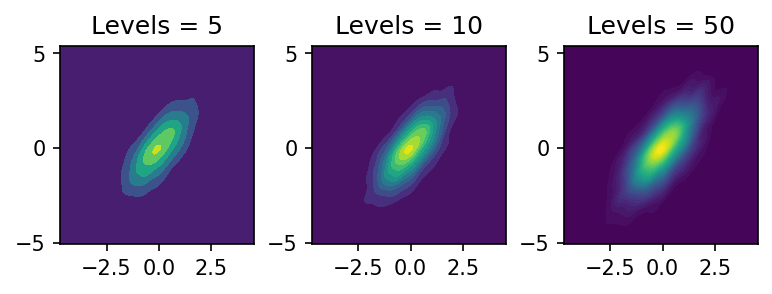

In [11]:
x = norm.rvs(size=3000)
y = x + norm.rvs(size=3000)

kde_res = 100 # Resolution of KDEs used to build contours
pad = 0.5 # Render contour outside of data range
xmin = x.min()-pad; xmax = x.max()+pad
ymin = y.min()-pad; ymax = y.max()+pad

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:kde_res*1j, ymin:ymax:kde_res*1j]
positions = np.vstack([xx.ravel(), yy.ravel()])

kernel = gaussian_kde(np.vstack([x, y]))

z = np.reshape(kernel(positions).T, xx.shape)

# Mask missing values
# z = np.ma.masked_where(z <= 0, z)

fig = plt.figure(figsize=(6, 1.75), dpi=150)
gs = fig.add_gridspec(1, 3, wspace=0.3)

ax = fig.add_subplot(gs[0, 0])
cs = ax.contourf(xx, yy, z, levels=5, cmap=mpl.cm.viridis)
ax.set_title('Levels = 5')

ax = fig.add_subplot(gs[0, 1])
cs = ax.contourf(xx, yy, z, levels=10, cmap=mpl.cm.viridis)
ax.set_title('Levels = 10')

ax = fig.add_subplot(gs[0, 2])
cs = ax.contourf(xx, yy, z, levels=50, cmap=mpl.cm.viridis)
ax.set_title('Levels = 50')

plt.show()